# Exploratory Data Analysis

##### We perform EDA in this notebook to better understand the characteristics of our data before proceeding to feature engineering and model fitting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dython import nominal

In [2]:
train = pd.read_csv(r"C:\Users\malli\Documents\GitHub\Big-Mart-Sales-Prediction-Practice-Problem--\Datasets\train_cleaned.csv")
test = pd.read_csv(r"C:\Users\malli\Documents\GitHub\Big-Mart-Sales-Prediction-Practice-Problem--\Datasets\test_cleaned.csv")

In [3]:
combined = pd.concat([train, test], ignore_index=True)
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item                       14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet                     14204 non-null  object 
 7   Years_Since_Establishment  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


# Univariate Analysis

## Numeric Features Analysis

In [118]:
combined_num_cols = combined.select_dtypes(include=['float64', 'int64'])
train_num_cols = train.select_dtypes(include=['float64', 'int64'])
test_num_cols = test.select_dtypes(include=['float64', 'int64'])

In [119]:
import warnings
warnings.simplefilter("ignore")


#### Data Structure/Distribution Analysis

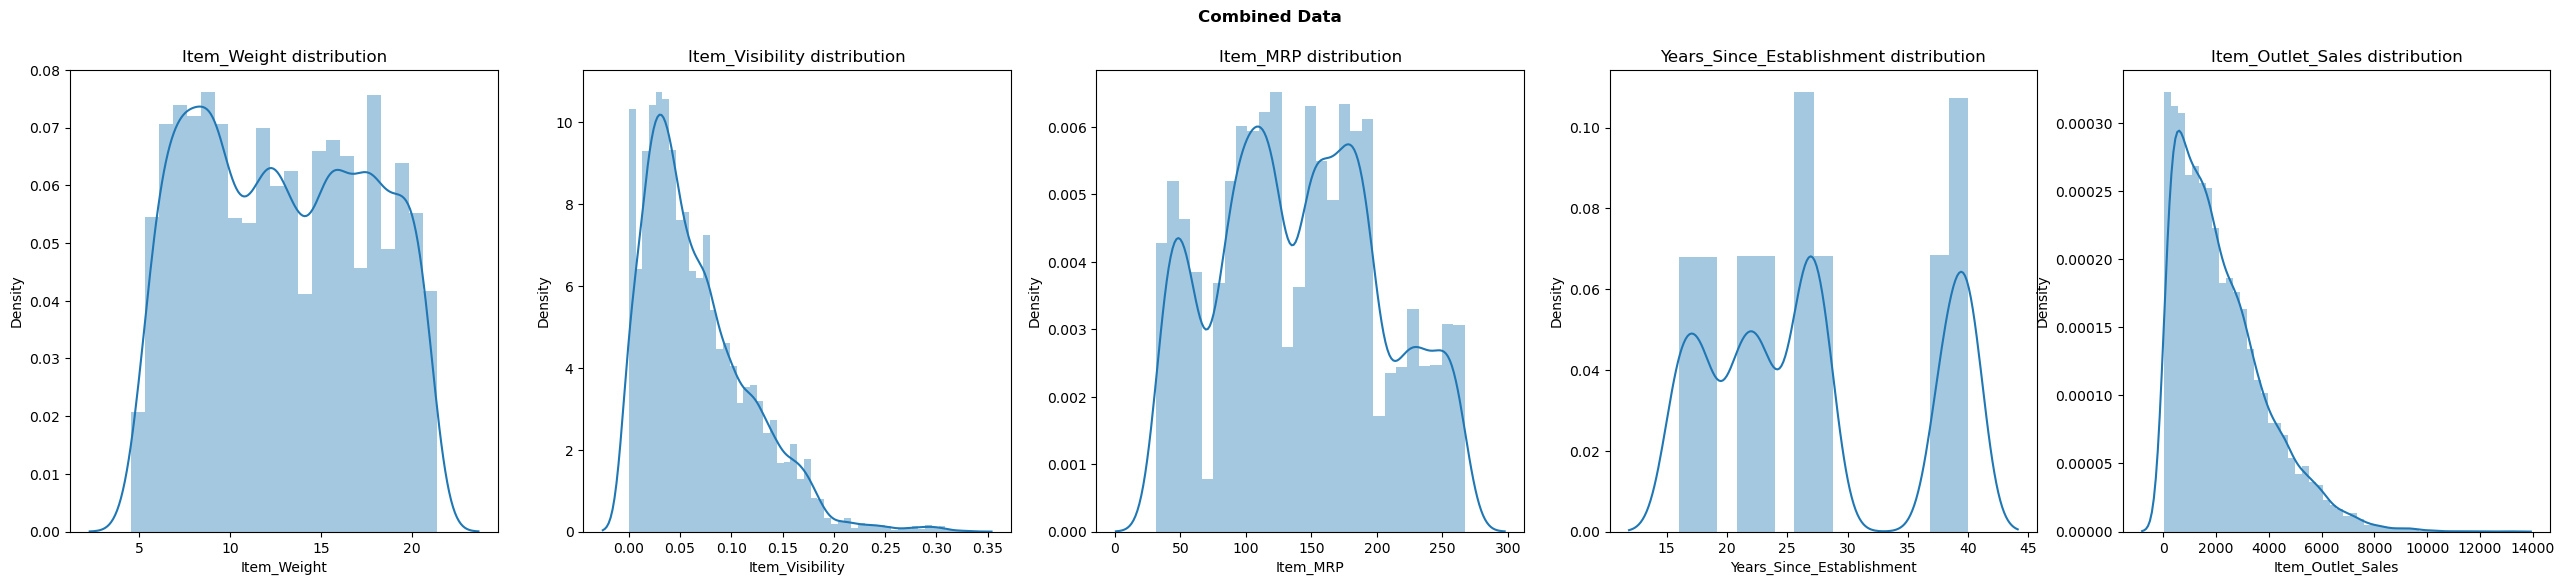

In [120]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(32, 6))
fig.suptitle('Combined Data', weight='bold')

for index, col in enumerate(combined_num_cols):
    sns.distplot(train_num_cols[col], kde=True, ax=ax[index])
    ax[index].set_title(f'{col} distribution')

In [121]:
# Calculating statistics for combined numerical columns
combined_num_stats = pd.DataFrame({'skewness': combined_num_cols.skew(), 'kurtosis': combined_num_cols.kurt()})
combined_num_stats = pd.concat([combined_num_stats, combined_num_cols.describe().T], axis=1)
combined_num_stats


skewness  kurtosis    count         mean  \
Item_Weight                0.100417 -1.227420  14204.0    12.793380   
Item_Visibility            1.195175  1.820071  14204.0     0.065953   
Item_MRP                   0.130728 -0.893856  14204.0   141.004977   
Years_Since_Establishment  0.396465 -1.205867  14204.0    27.169319   
Item_Outlet_Sales          1.177531  1.615877   8523.0  2181.288914   

                                   std     min         25%          50%  \
Item_Weight                   4.651716   4.555    8.710000    12.600000   
Item_Visibility               0.051459   0.000    0.027036     0.054021   
Item_MRP                     62.086938  31.290   94.012000   142.247000   
Years_Since_Establishment     8.371664  16.000   21.000000    26.000000   
Item_Outlet_Sales          1706.499616  33.290  834.247400  1794.331000   

                                   75%           max  
Item_Weight                  16.750000     21.350000  
Item_Visibility               0.094037      0.328391  
Item_MRP                    185.855600    266.888400  
Years_Since_Establishment    38.000000     40.000000  
Item_Outlet_Sales          3101.296400  13086.964800

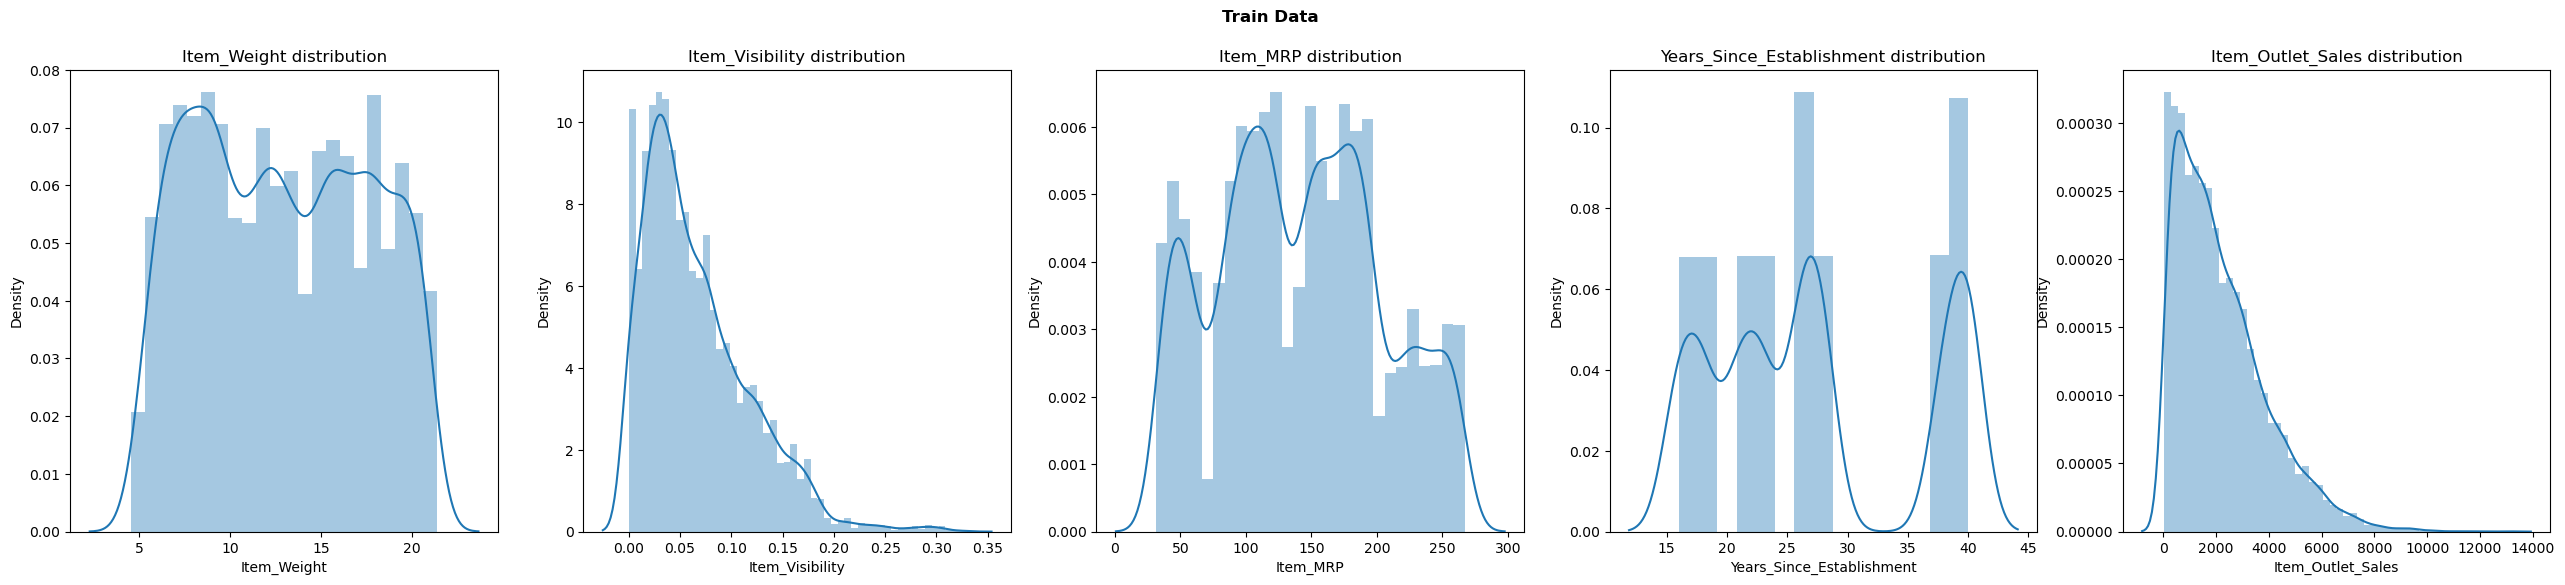

In [122]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(32, 6))
fig.suptitle('Train Data', weight='bold')

for index, col in enumerate(train_num_cols):
    sns.distplot(train_num_cols[col], kde=True, ax=ax[index])
    ax[index].set_title(f'{col} distribution')

In [123]:
# Calculating statistics for training numerical columns
train_num_stats = pd.DataFrame({'skewness': train_num_cols.skew(), 'kurtosis': train_num_cols.kurt()})
train_num_stats = pd.concat([train_num_stats, train_num_cols.describe().T], axis=1)
train_num_stats


skewness  kurtosis   count         mean  \
Item_Weight                0.071014 -1.230516  8523.0    12.873623   
Item_Visibility            1.167091  1.679445  8523.0     0.066132   
Item_MRP                   0.127202 -0.889769  8523.0   140.992782   
Years_Since_Establishment  0.396641 -1.205694  8523.0    27.168133   
Item_Outlet_Sales          1.177531  1.615877  8523.0  2181.288914   

                                   std     min         25%          50%  \
Item_Weight                   4.645893   4.555    8.785000    12.600000   
Item_Visibility               0.051598   0.000    0.026989     0.053931   
Item_MRP                     62.275067  31.290   93.826500   143.012800   
Years_Since_Establishment     8.371760  16.000   21.000000    26.000000   
Item_Outlet_Sales          1706.499616  33.290  834.247400  1794.331000   

                                   75%           max  
Item_Weight                  16.850000     21.350000  
Item_Visibility               0.094585      0.328391  
Item_MRP                    185.643700    266.888400  
Years_Since_Establishment    38.000000     40.000000  
Item_Outlet_Sales          3101.296400  13086.964800

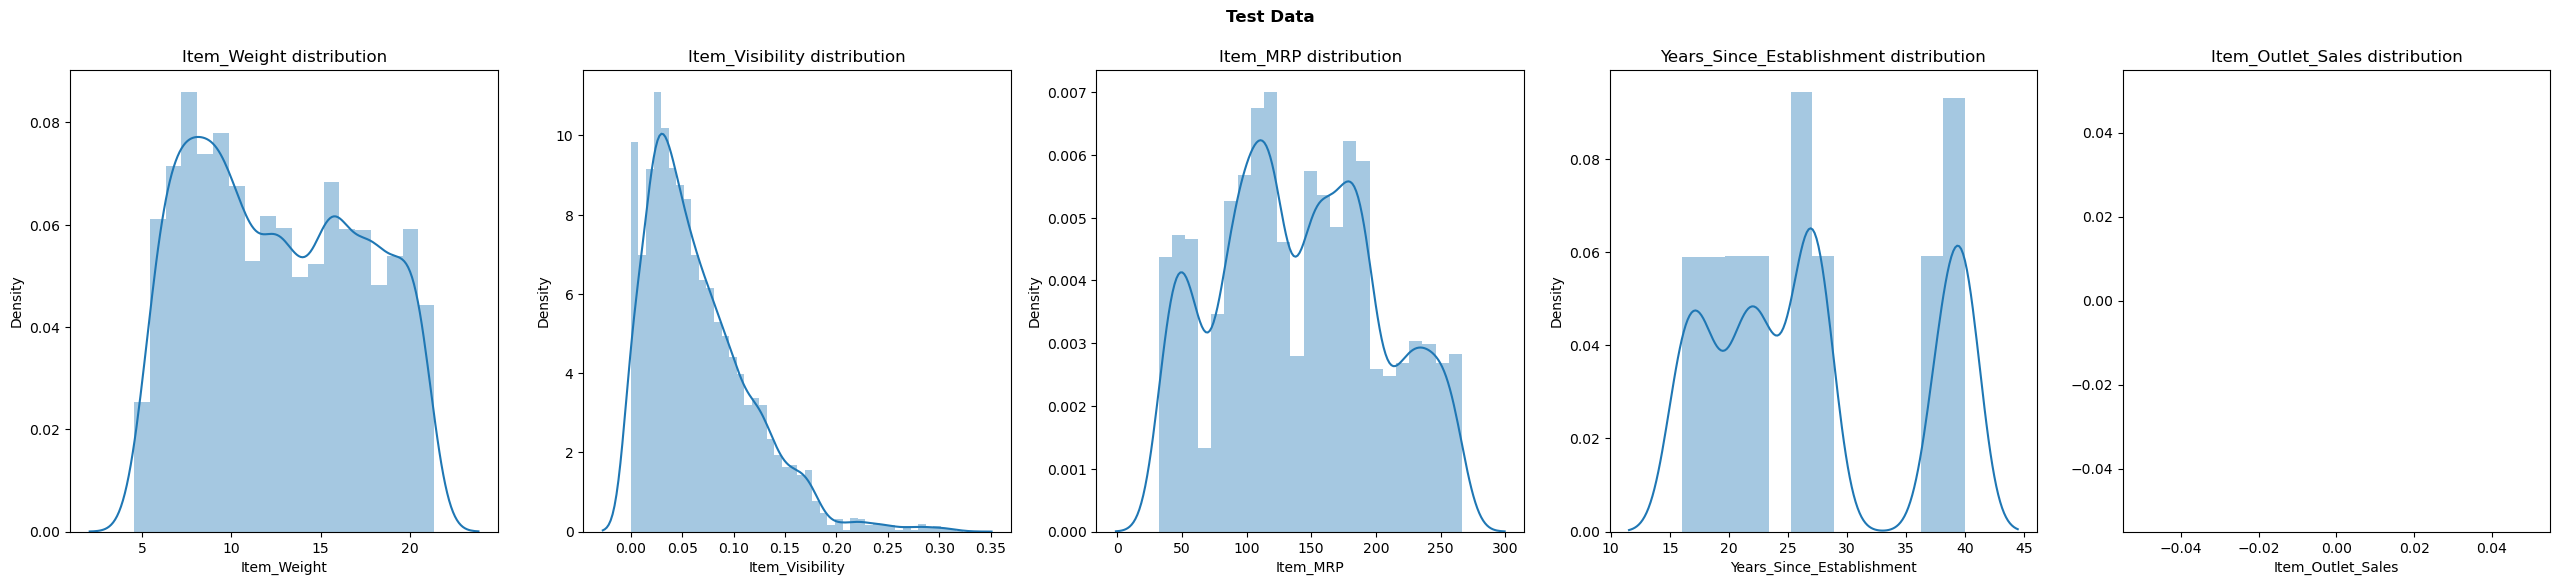

In [124]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(32, 6))
fig.suptitle('Test Data', weight='bold')

for index, col in enumerate(test_num_cols):
    sns.distplot(test_num_cols[col], kde=True, ax=ax[index])
    ax[index].set_title(f'{col} distribution')

In [125]:
# Calculating statistics for testing numerical columns
test_num_stats = pd.DataFrame({'skewness': test_num_cols.skew(), 'kurtosis': test_num_cols.kurt()})
test_num_stats = pd.concat([test_num_stats, test_num_cols.describe().T], axis=1)
test_num_stats


skewness  kurtosis   count        mean        std  \
Item_Weight                0.144796 -1.217919  5681.0   12.672996   4.658256   
Item_Visibility            1.238312  2.040199  5681.0    0.065684   0.051252   
Item_MRP                   0.136182 -0.900203  5681.0  141.023273  61.809091   
Years_Since_Establishment  0.396306 -1.206132  5681.0   27.171097   8.372256   
Item_Outlet_Sales               NaN       NaN     0.0         NaN        NaN   

                              min        25%         50%         75%  \
Item_Weight                 4.555   8.615000   12.350000   16.700000   
Item_Visibility             0.000   0.027047    0.054154    0.093463   
Item_MRP                   31.990  94.412000  141.415400  186.026600   
Years_Since_Establishment  16.000  21.000000   26.000000   38.000000   
Item_Outlet_Sales             NaN        NaN         NaN         NaN   

                                  max  
Item_Weight                 21.350000  
Item_Visibility              0.323637  
Item_MRP                   266.588400  
Years_Since_Establishment   40.000000  
Item_Outlet_Sales                 NaN

#### Outlier Detection Analysis

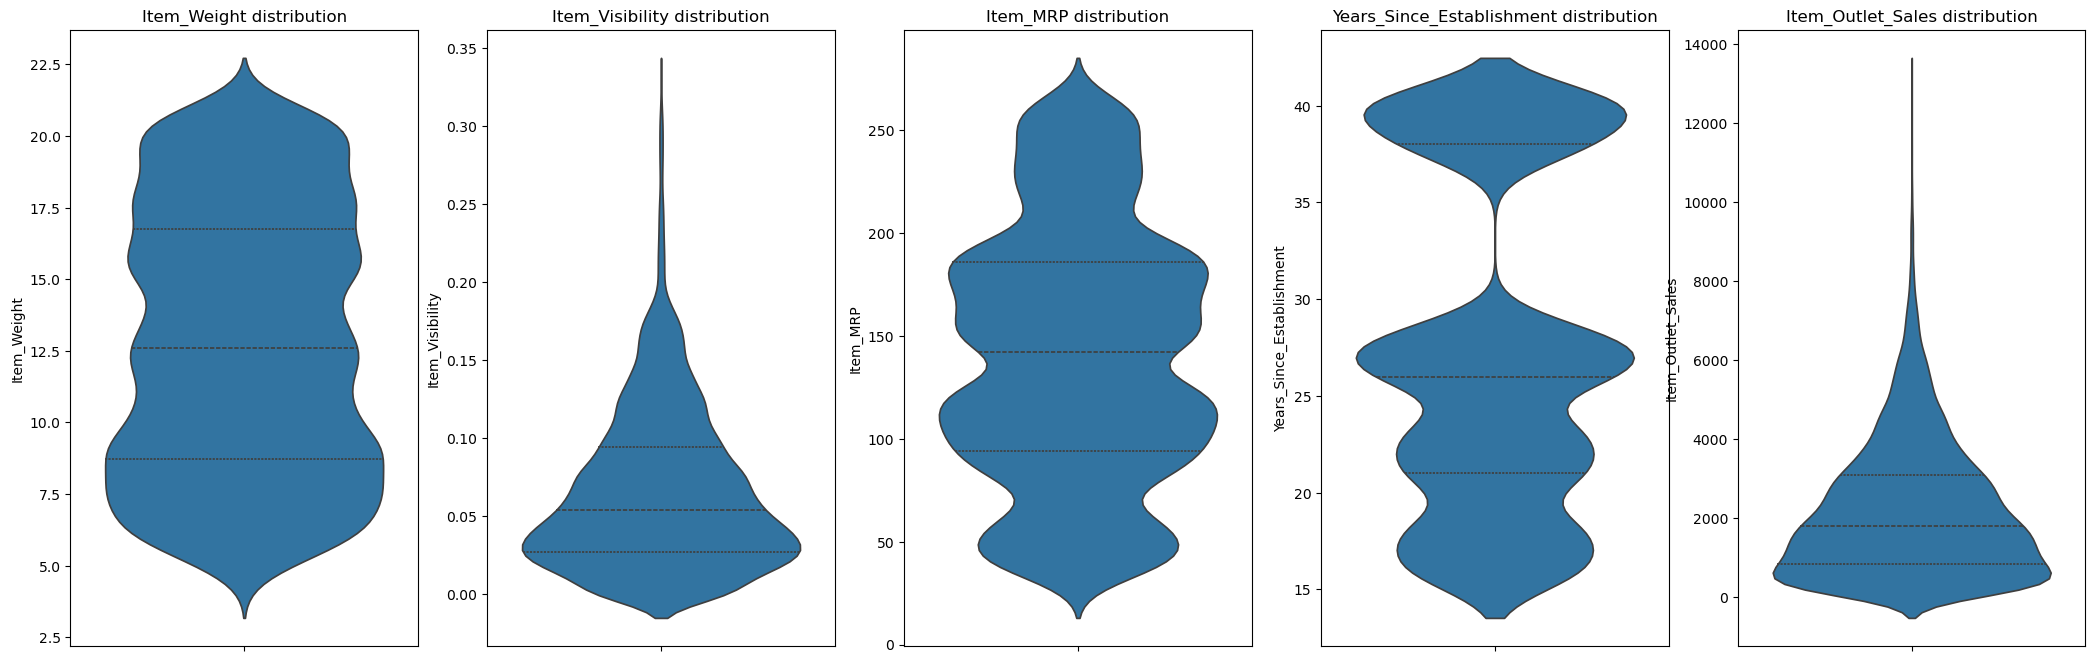

In [126]:
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(26,8))
for index, col in enumerate(combined_num_cols):
    sns.violinplot(data=combined_num_cols, y=col, ax=ax[index], inner='quart')
    ax[index].set_title(f'{col} distribution')

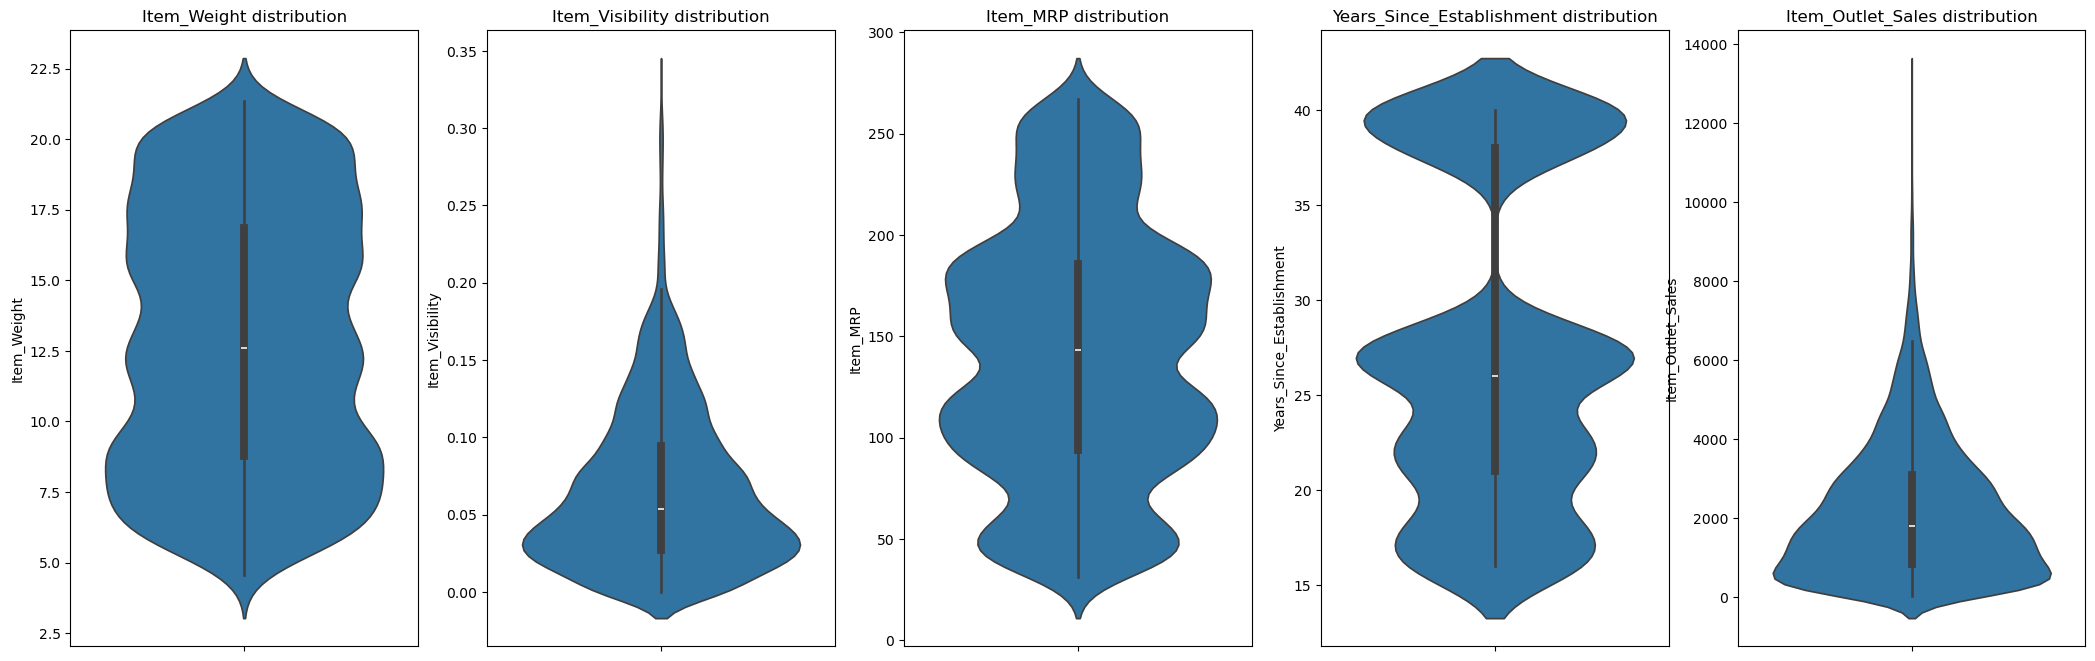

In [127]:
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(26,8))
for index, col in enumerate(train_num_cols):
    sns.violinplot(data=train_num_cols, y=col, ax=ax[index], inner='box')
    ax[index].set_title(f'{col} distribution')

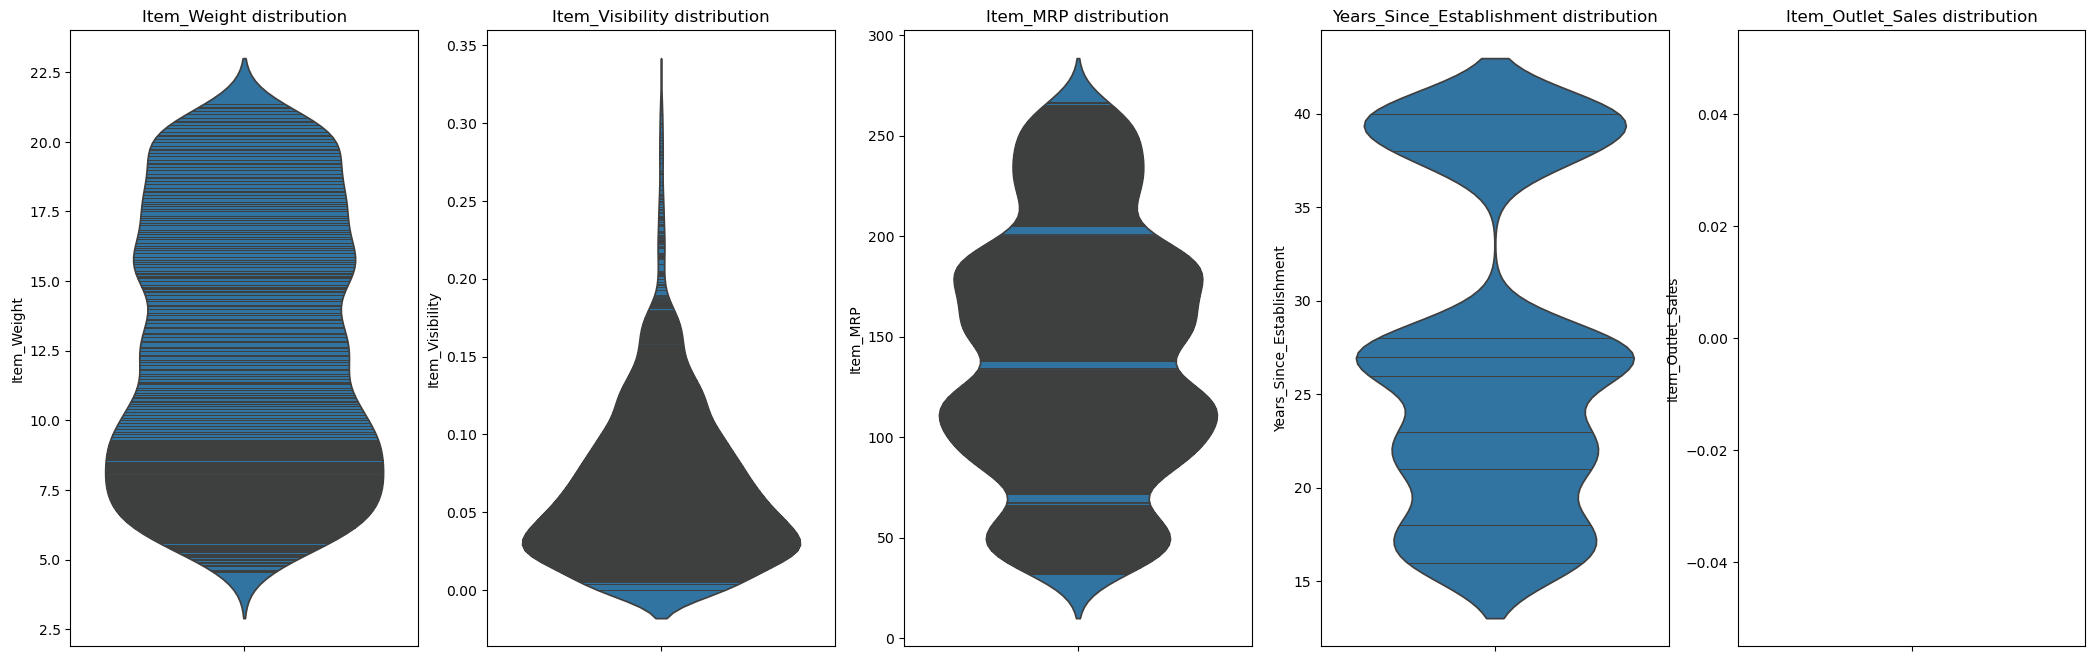

In [128]:
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(26,8))
for index, col in enumerate(test_num_cols):
    sns.violinplot(data=test_num_cols, y=col, ax=ax[index], inner='stick')
    ax[index].set_title(f'{col} distribution')

#### Correlation Analysis

Text(0.5, 1.0, 'Combined Data Correlation Heatmap')

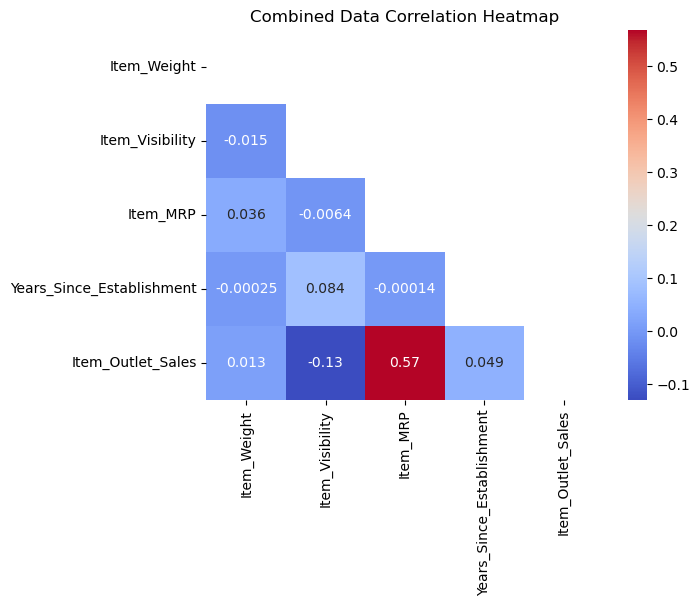

In [129]:
mask = np.triu(combined_num_cols.corr())
heatmap = sns.heatmap(combined_num_cols.corr(), annot=True, cmap='coolwarm', mask=mask)
heatmap.set_title('Combined Data Correlation Heatmap')

Text(0.5, 1.0, 'Test Data Correlation Heatmap')

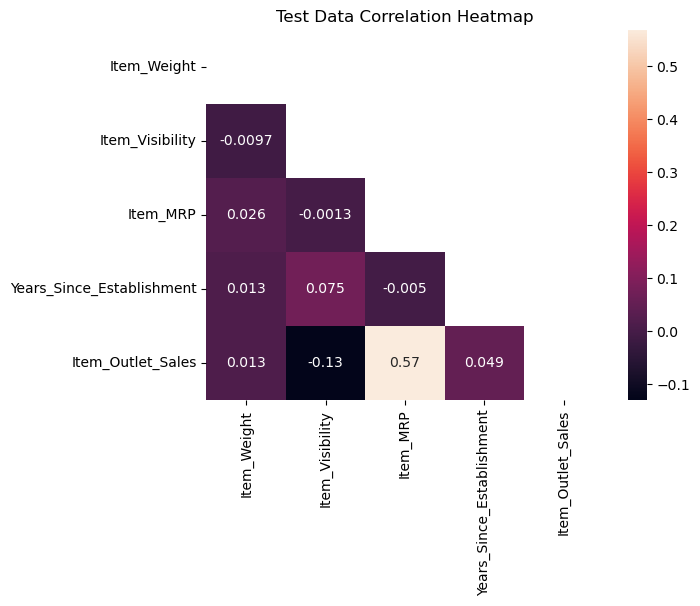

In [130]:
mask = np.triu(train_num_cols.corr())
heatmap = sns.heatmap(train_num_cols.corr(), annot=True, mask=mask)
heatmap.set_title('Test Data Correlation Heatmap')

Text(0.5, 1.0, 'Test Data Correlation Heatmap')

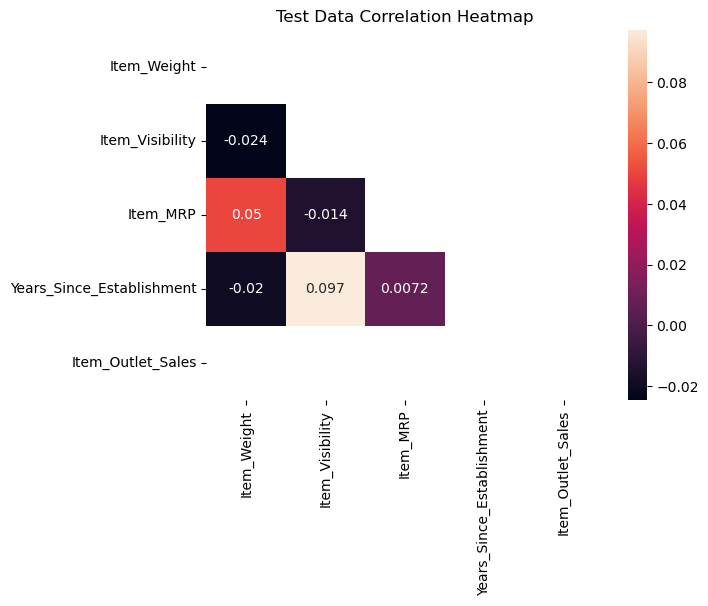

In [131]:
mask = np.triu(test_num_cols.corr())
heatmap = sns.heatmap(test_num_cols.corr(), annot=True, mask=mask)
heatmap.set_title('Test Data Correlation Heatmap')

#### **Conclusion:** 
#### 1. Except Item_Visibility, most of the data is relatively normally distributed and free of outliers. So, we'll apply power tranformations such as Yeo-Johnson, and RobustScaling accordingly. 
#### 2. We'll choose to not apply any transformations to the Sales feature in order to retain it's original information as much as possible since it's the target variable. 
#### 3. Only Item_MRP is significantly correlated with Sales (target variable), which we'll keep this information in mind for feature engineering.
#### 4. We also notice that the data's characteristics remains indistinguishable amongst train & test sets, therefore, we can apply the same transformations across the whole combined dataset.

## Categorical Features Analysis

In [132]:
combined_cat_cols = combined.select_dtypes(include=['object'])
train_cat_cols = train.select_dtypes(include=['object'])
test_cat_cols = test.select_dtypes(include=['object'])

In [133]:
combined_cat_cols.nunique()

Item                    1559
Item_Fat_Content           2
Item_Type                 16
Outlet                    10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [134]:
train_cat_cols.nunique()

Item                    1559
Item_Fat_Content           2
Item_Type                 16
Outlet                    10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [135]:
test_cat_cols.nunique()

Item                    1543
Item_Fat_Content           2
Item_Type                 16
Outlet                    10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [136]:
combined_cat_cols = combined_cat_cols.drop(['Item'], axis=1)
train_cat_cols = train_cat_cols.drop(['Item'], axis=1)
test_cat_cols = test_cat_cols.drop(['Item'], axis=1)

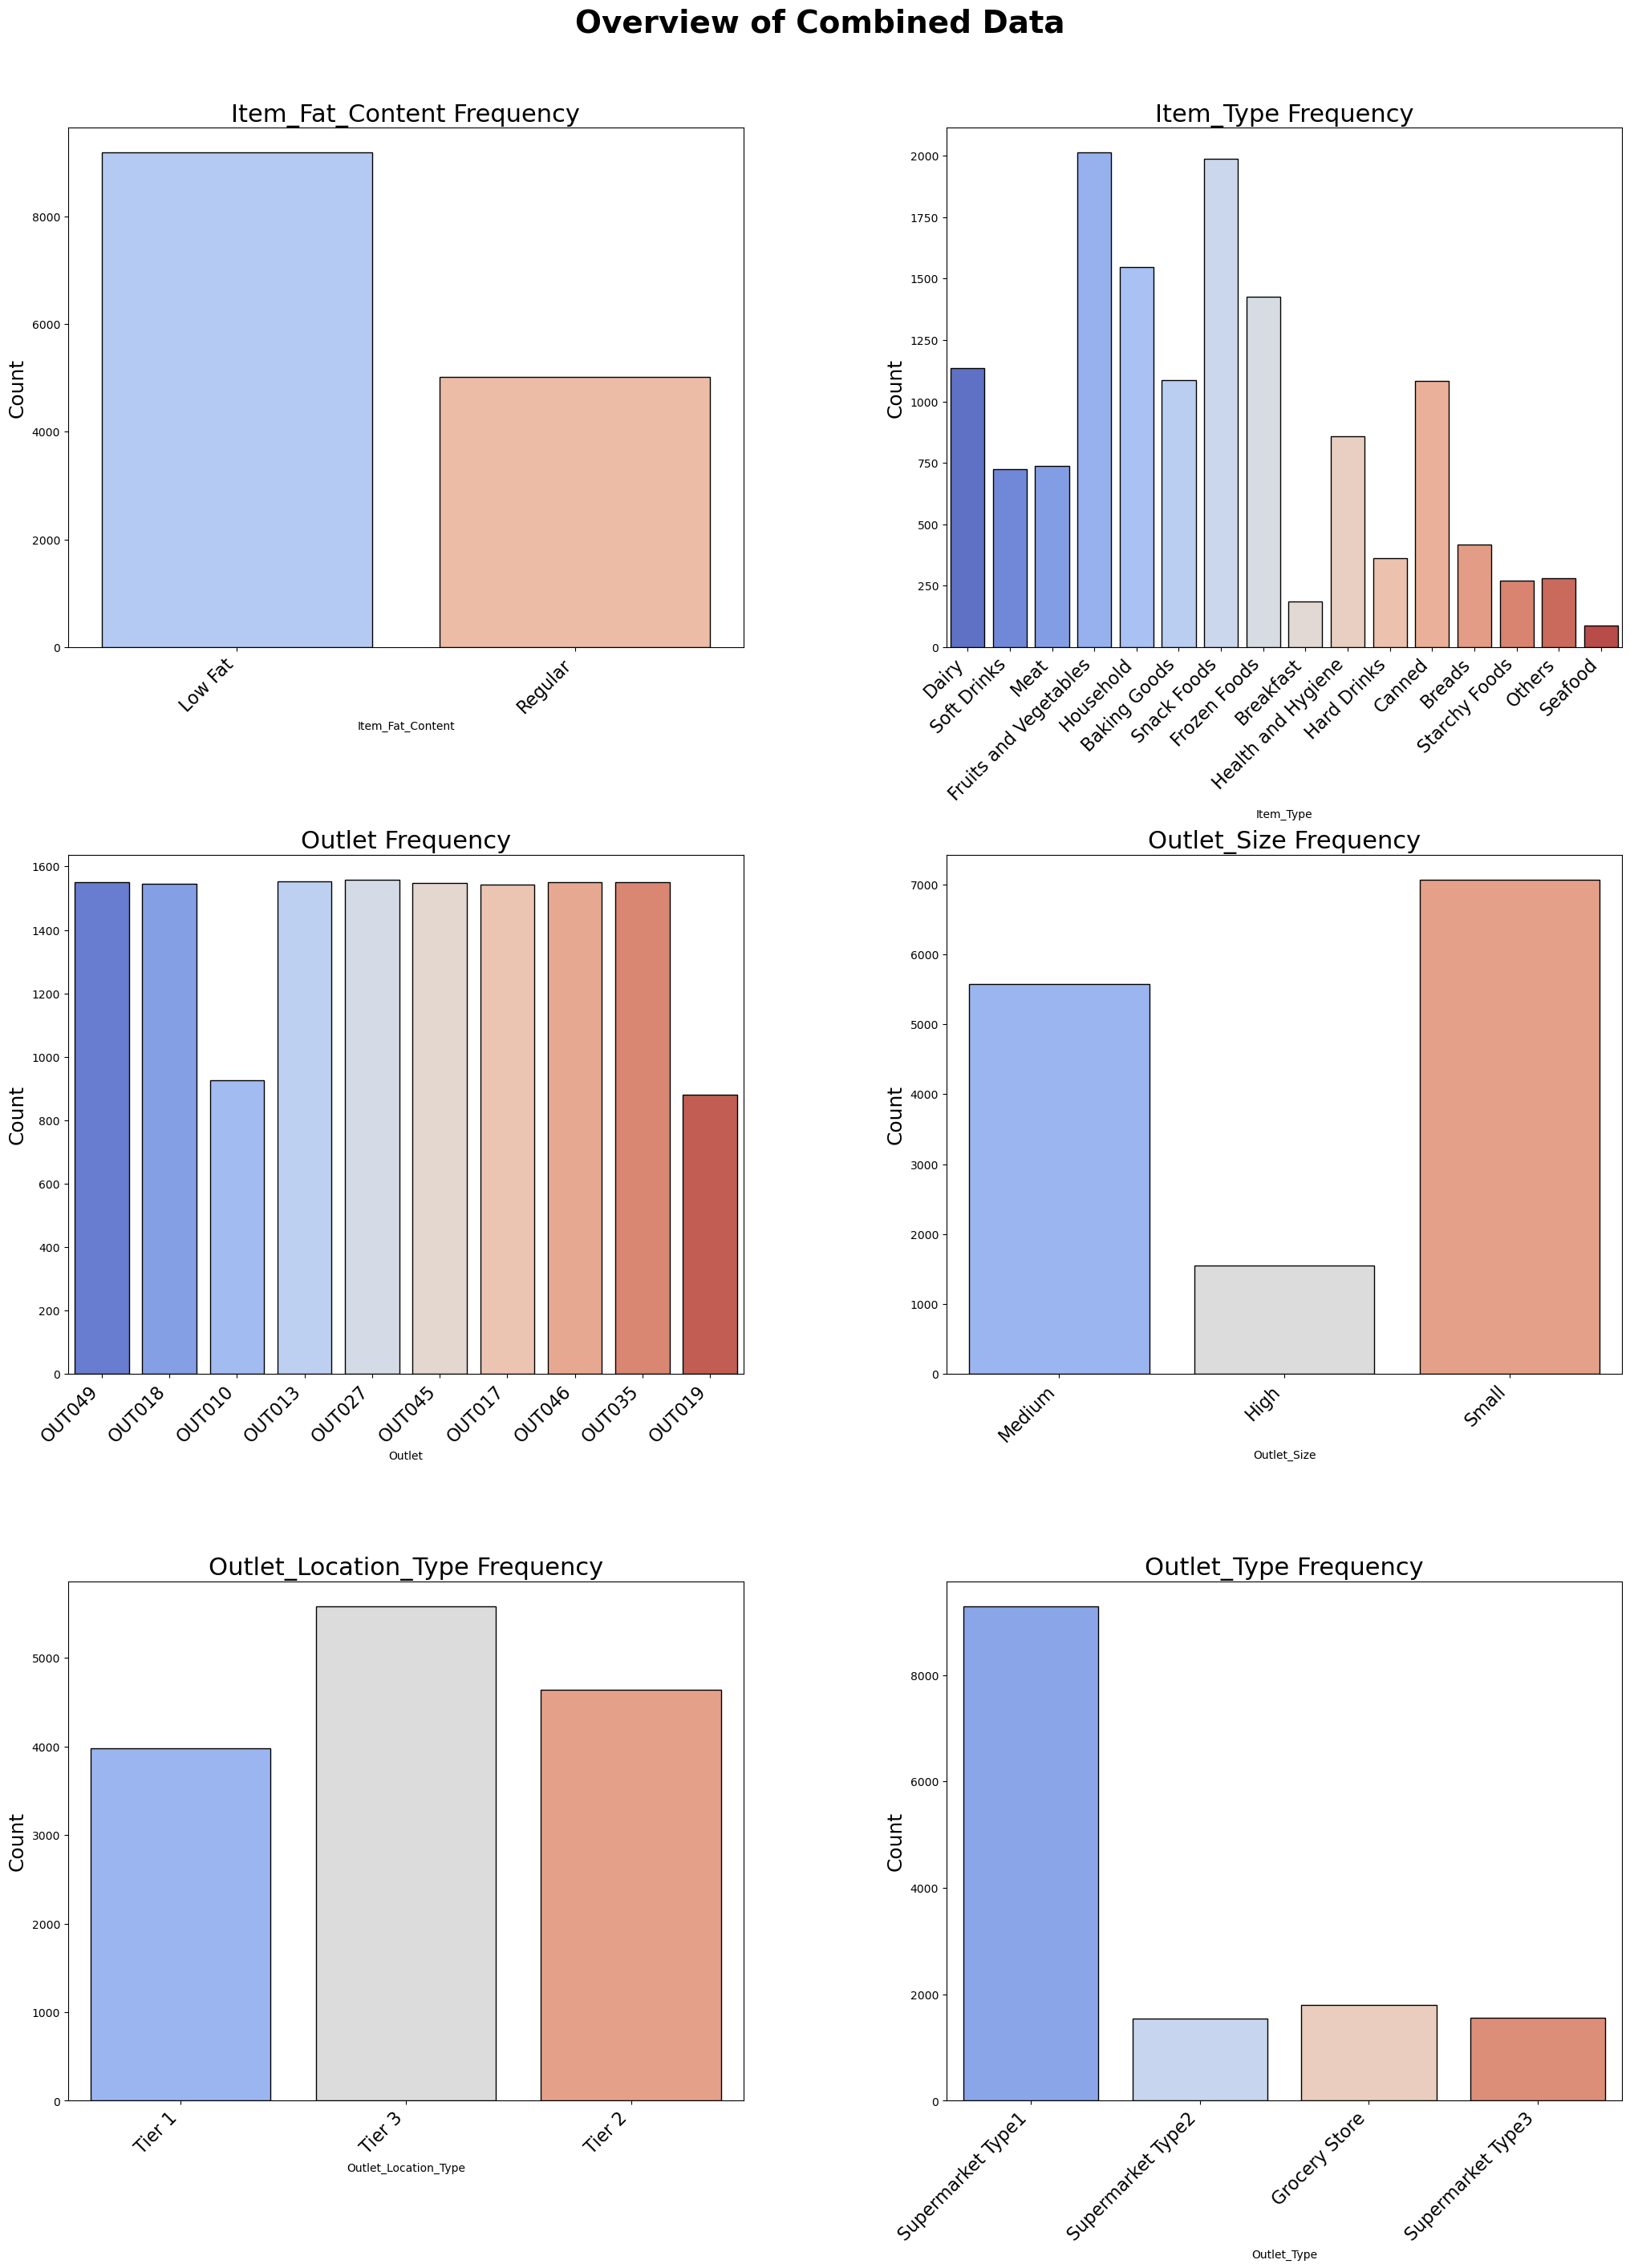

In [137]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25, 30))
fig.suptitle('Overview of Combined Data', fontsize=28, fontweight='bold')

for i, feature in enumerate(combined_cat_cols):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    sns.countplot(x=feature, data=combined_cat_cols, ax=ax, palette='coolwarm', edgecolor='black')
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=16)
    
    ax.set_title(f'{feature} Frequency', fontsize=22)
    
    ax.set_ylabel('Count', fontsize=18)

plt.subplots_adjust(top=0.93, hspace=0.4, wspace=0.3)
plt.show()


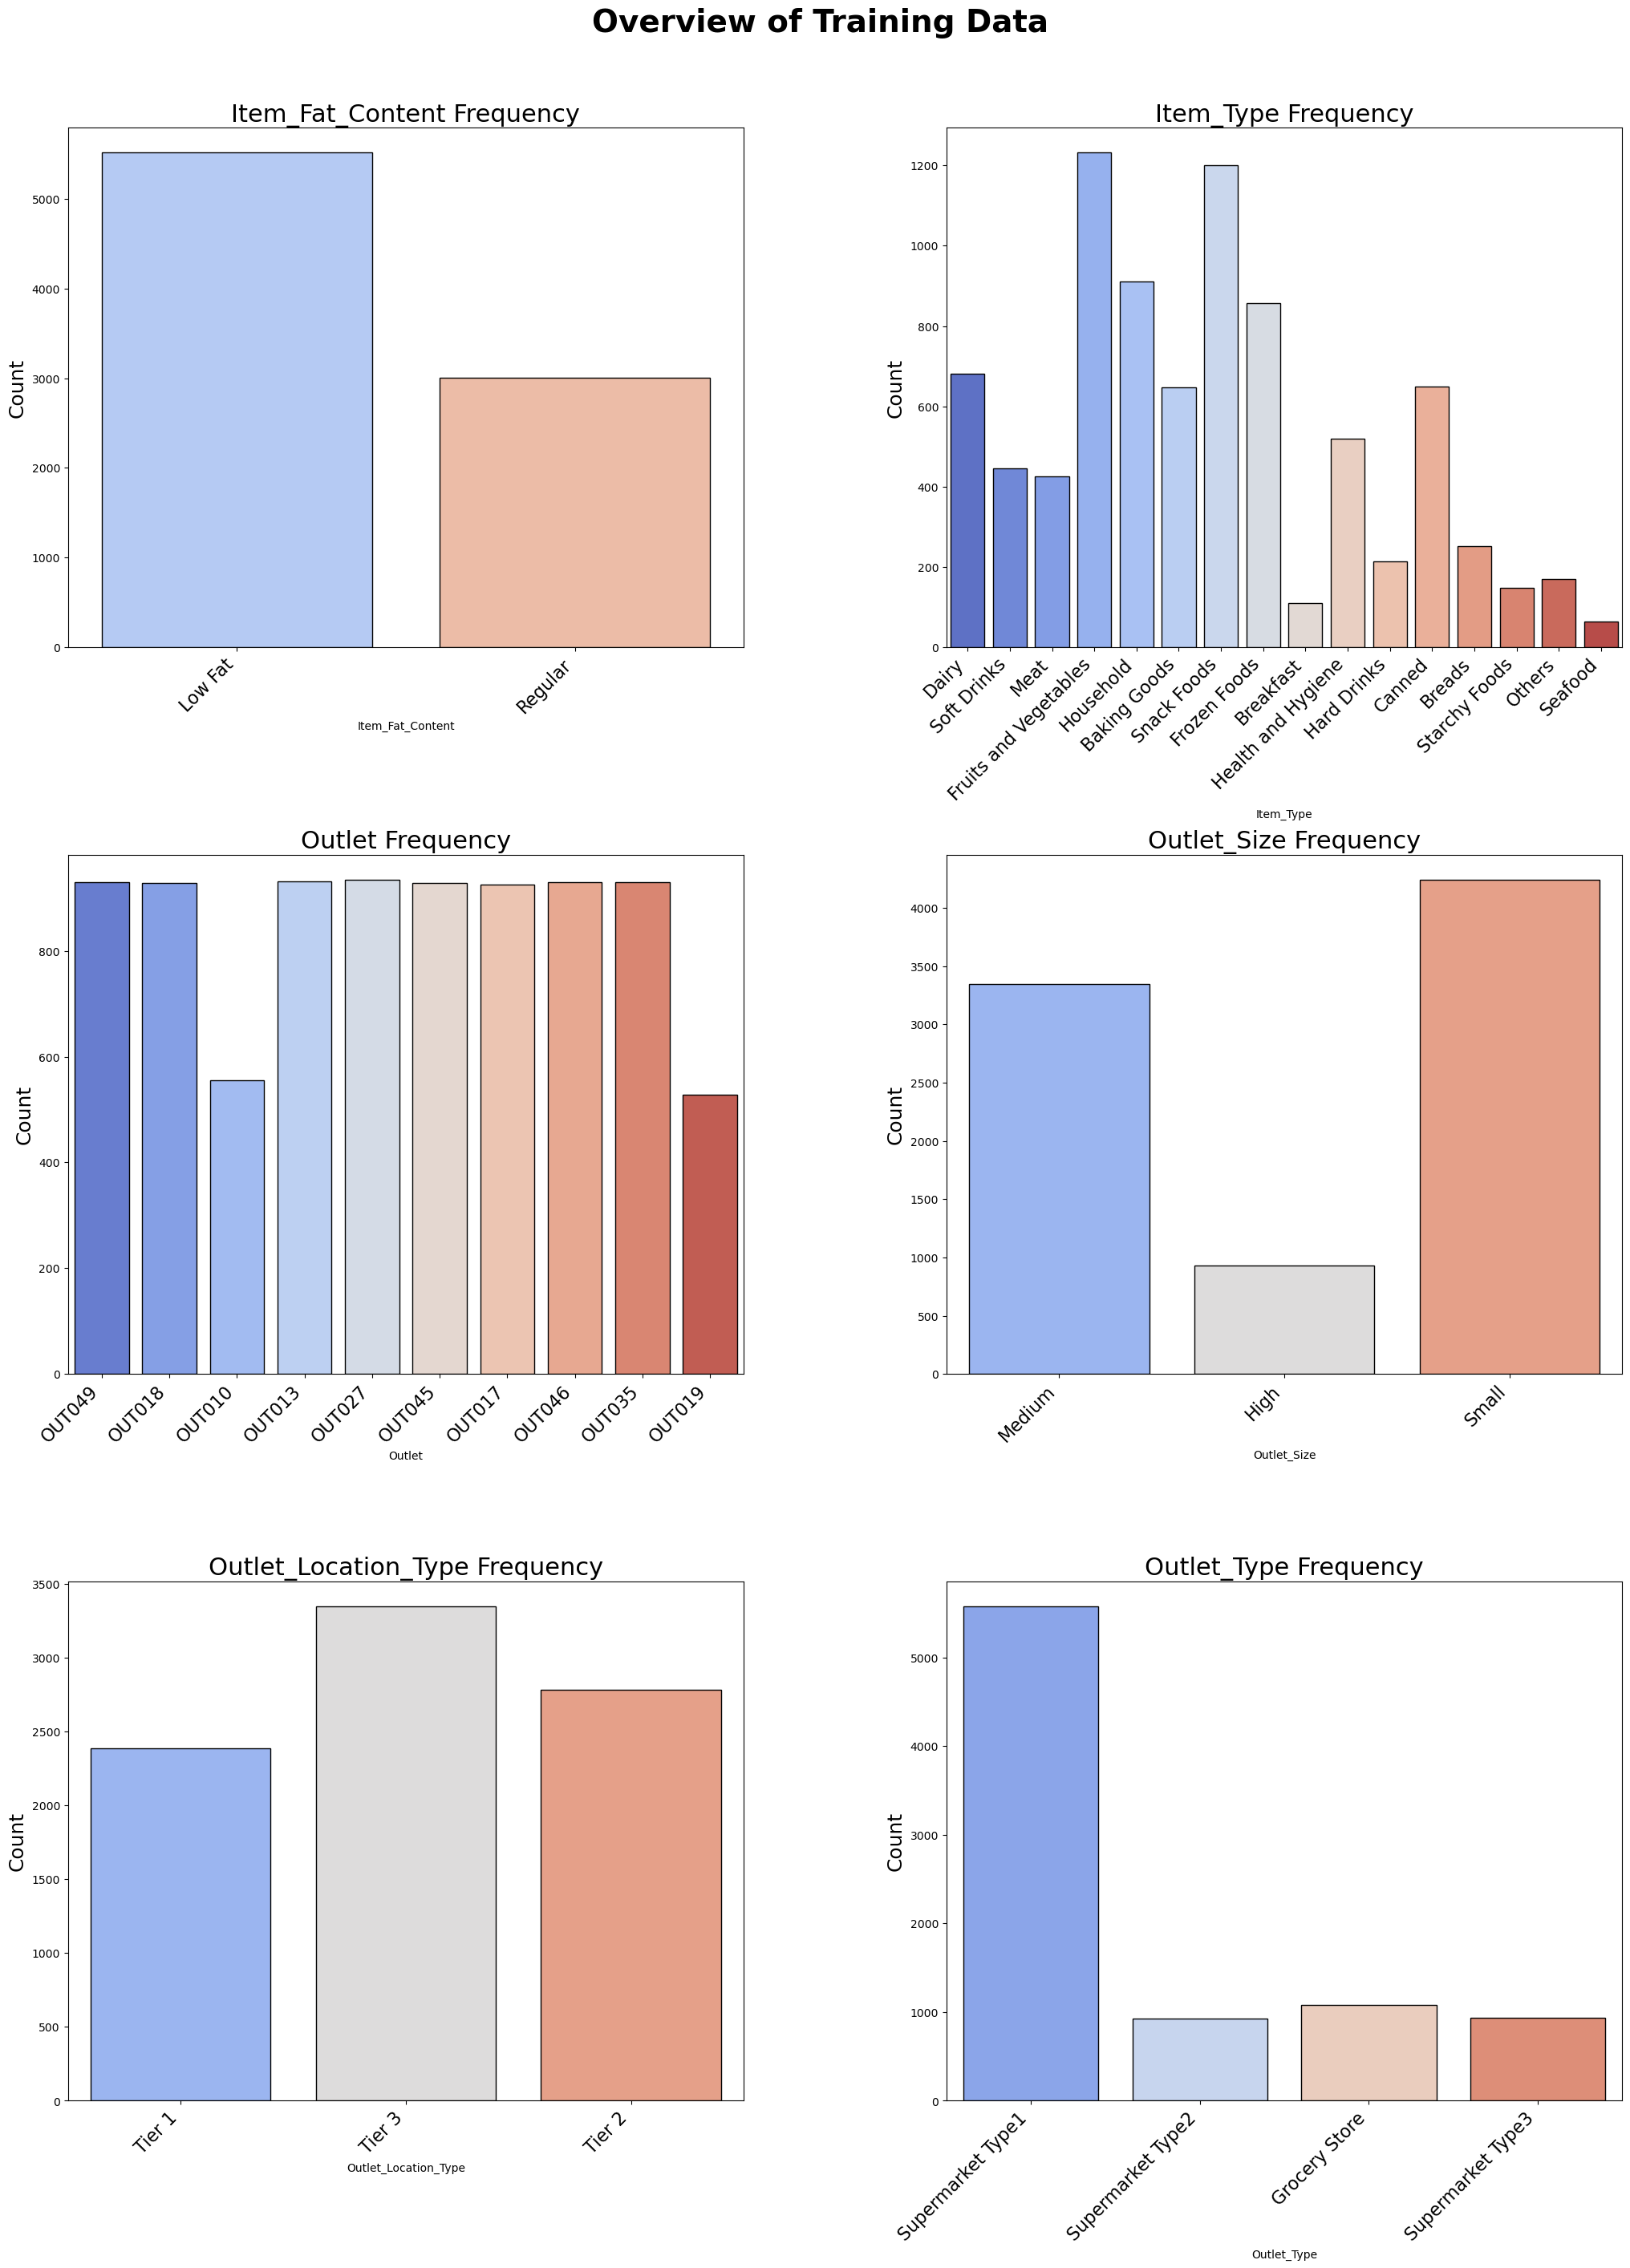

In [138]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25, 30))
fig.suptitle('Overview of Training Data', fontsize=28, fontweight='bold')

for i, feature in enumerate(train_cat_cols):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    sns.countplot(x=feature, data=train_cat_cols, ax=ax, palette='coolwarm', edgecolor='black')
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=16)
    
    ax.set_title(f'{feature} Frequency', fontsize=22)
    
    ax.set_ylabel('Count', fontsize=18)

plt.subplots_adjust(top=0.93, hspace=0.4, wspace=0.3)
plt.show()


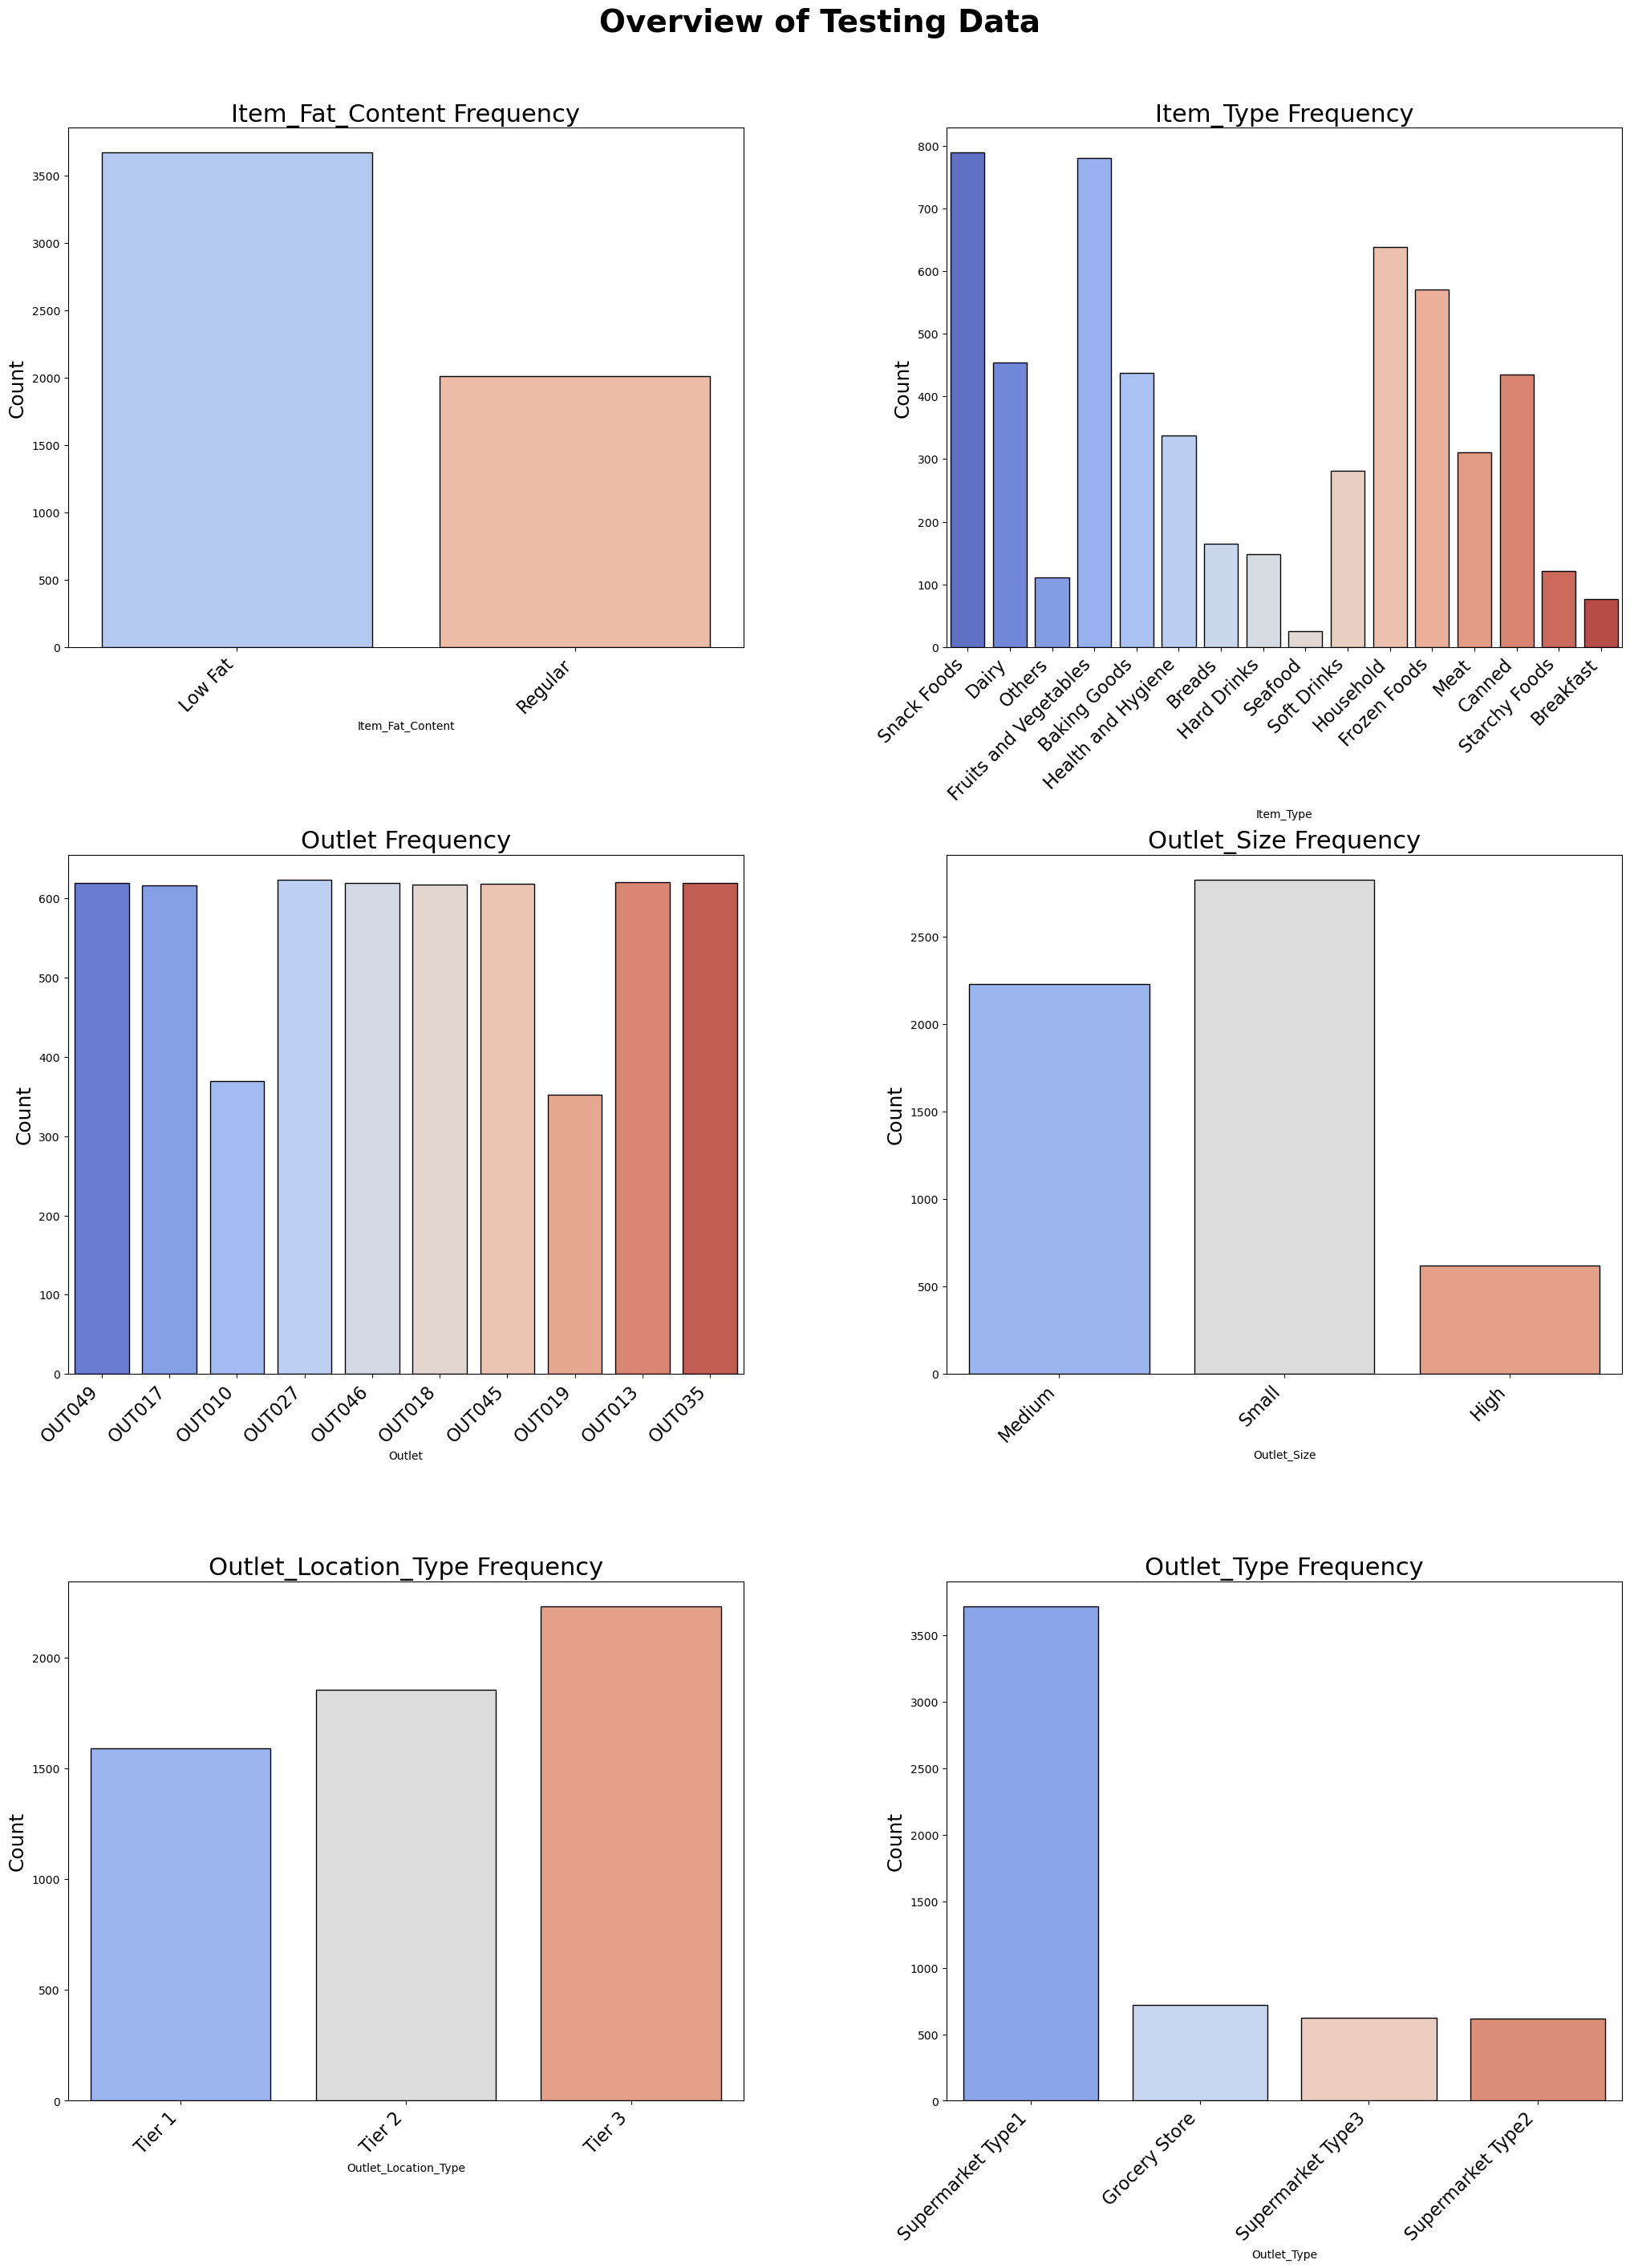

In [139]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25, 30))
fig.suptitle('Overview of Testing Data', fontsize=28, fontweight='bold')

for i, feature in enumerate(test_cat_cols):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    sns.countplot(x=feature, data=test_cat_cols, ax=ax, palette='coolwarm', edgecolor='black')
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=16)
    
    ax.set_title(f'{feature} Frequency', fontsize=22)
    
    ax.set_ylabel('Count', fontsize=18)

plt.subplots_adjust(top=0.93, hspace=0.4, wspace=0.3)
plt.show()


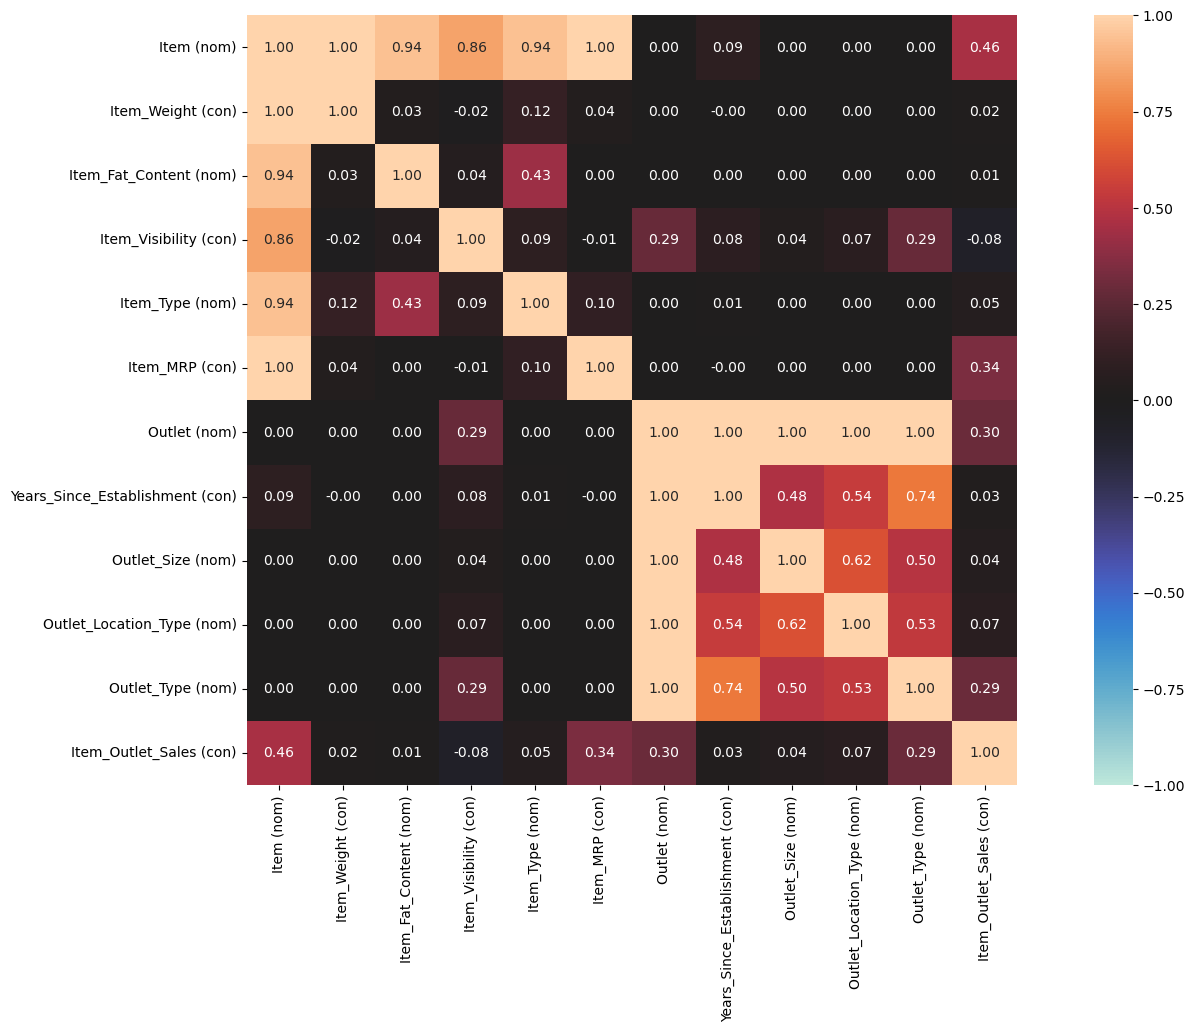

In [4]:
grand_corr = nominal.associations(combined, figsize=(20,10), mark_columns=True)
grand_corr_df = pd.DataFrame(grand_corr['corr'])



### **Item Distribution Analysis**

We first figure out **how many counts of each item exists in total**, and we compare the **counts existing in training vs testing.** This gives us an idea about which exact items we have low training data for and therefore we can try to account for those items seperately

In [140]:
pd.DataFrame(combined['Item'].value_counts().astype(int))['count'].value_counts()

count
9     737
10    504
8     305
7      13
Name: count, dtype: int64

In [141]:
unique_items = combined['Item'].unique().tolist()
unique_items = pd.DataFrame(unique_items)
unique_items = unique_items.rename(columns={unique_items.columns[0]: 'Item'})
unique_items
        

Item
0     FDA15
1     DRC01
2     FDN15
3     FDX07
4     NCD19
...     ...
1554  FDD28
1555  FDU43
1556  NCF55
1557  NCW30
1558  NCW05

[1559 rows x 1 columns]

In [142]:
# Number of coutns in the training and testing dataframes.
train_counts = train.groupby('Item').size().reset_index(name='train_count')
test_counts  = test.groupby('Item').size().reset_index(name='test_count')

# Mergeing the counts with the unique_items dataframe.
df_counts = unique_items.merge(train_counts, on='Item', how='left') \
                        .merge(test_counts, on='Item', how='left')

# Fill any missing counts (if an item is absent in one of the datasets) with 0.
df_counts['train_count'] = df_counts['train_count'].fillna(0).astype(int)
df_counts['test_count']  = df_counts['test_count'].fillna(0).astype(int)
df_counts['total_count'] = df_counts['train_count'] + df_counts['test_count']

# Computing the ratio of Number of Training counts/Testing Counts.
def compute_ratio(train_count, test_count):
    if test_count == 0:
        # If test count is 0(i.e. No test data for that item)
        return np.inf
    elif train_count == 0:
        # If training count  is 0 (i.e. No training data for that item)
        return "0"
    else:
        return train_count / test_count

df_counts['ratio'] = df_counts.apply(lambda row: compute_ratio(row['train_count'], row['test_count']), axis=1)

# final dataframe with the compiled data
result_df = df_counts[['Item', 'train_count', 'test_count', 'total_count', 'ratio']]

print(result_df)


       Item  train_count  test_count  total_count     ratio
0     FDA15            8           1            9  8.000000
1     DRC01            6           3            9  2.000000
2     FDN15            7           3           10  2.333333
3     FDX07            6           3            9  2.000000
4     NCD19            6           3            9  2.000000
...     ...          ...         ...          ...       ...
1554  FDD28            4           5            9  0.800000
1555  FDU43            2           7            9  0.285714
1556  NCF55            3           5            8  0.600000
1557  NCW30            2           6            8  0.333333
1558  NCW05            2           7            9  0.285714

[1559 rows x 5 columns]


Now that we have computed the ratio of Number of Training Set Occurences/Test Set Occurences of every given item. We say that if the ratio is less than 1 then we have less training data for those exact Items to predict Sales with confidence

In [143]:
bad_df = result_df[result_df['ratio'] < 1]
good_df = result_df[result_df['ratio'] >= 1]

In [144]:
bad_items = np.array(bad_df['Item'].values.tolist())
good_items = np.array(good_df['Item'].values.tolist())

In [145]:
good_items_count = good_items.size
bad_items_count = bad_items.size
good_items.size + bad_items.size, round(good_items.size/bad_items.size, 2)

(1559, 4.01)

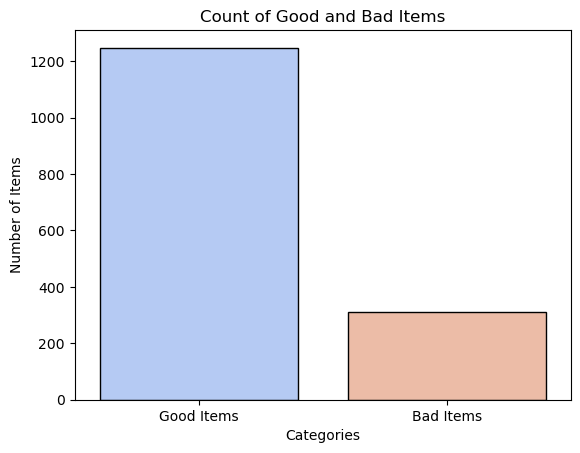

In [146]:
# Visualizing the count of good and bad items
temp_categories = ['Good Items', 'Bad Items']
temp_values = [good_items_count, bad_items_count]
sns.barplot(x=temp_categories, y=temp_values, palette='coolwarm', edgecolor='black')
plt.xlabel('Categories')
plt.ylabel('Number of Items')
plt.title('Count of Good and Bad Items')
plt.show()


#### **Conclusion:** 
#### *For ~20% of Items we have less training data than testing data. Therefore we could approach predicting sales for these items with a special method.*

## Multivariate Analysis

In [147]:
sales_train = train['Item_Outlet_Sales']

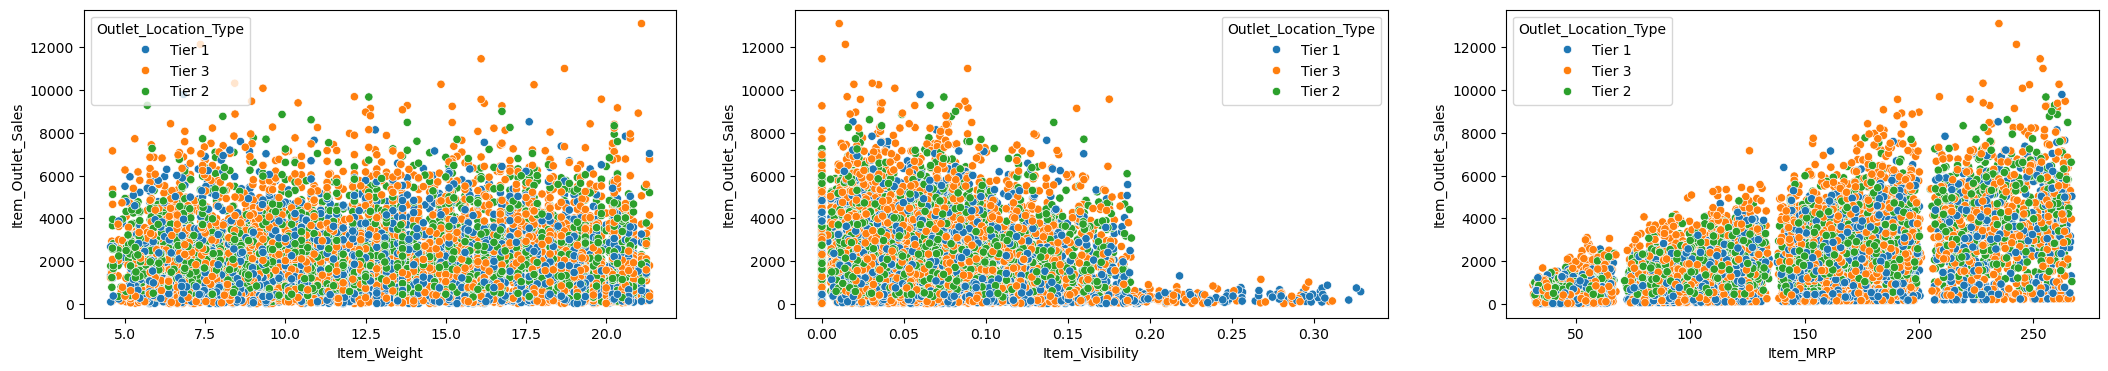

In [148]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(26, 4))

for index, col in enumerate(['Item_Weight', 'Item_Visibility', 'Item_MRP']):
    sns.scatterplot(data=train,x=col, y=sales_train, ax=ax[index], hue='Outlet_Location_Type')

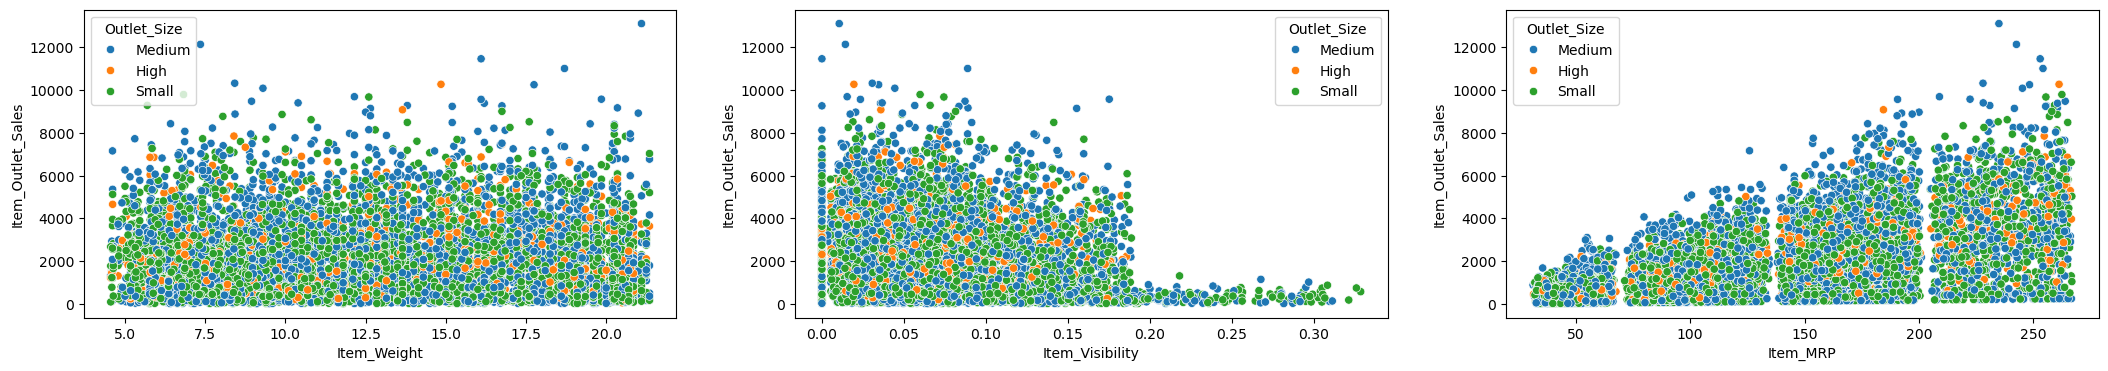

In [149]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(26, 4))

for index, col in enumerate(['Item_Weight', 'Item_Visibility', 'Item_MRP']):
    sns.scatterplot(data=train,x=col, y=sales_train, ax=ax[index], hue='Outlet_Size')

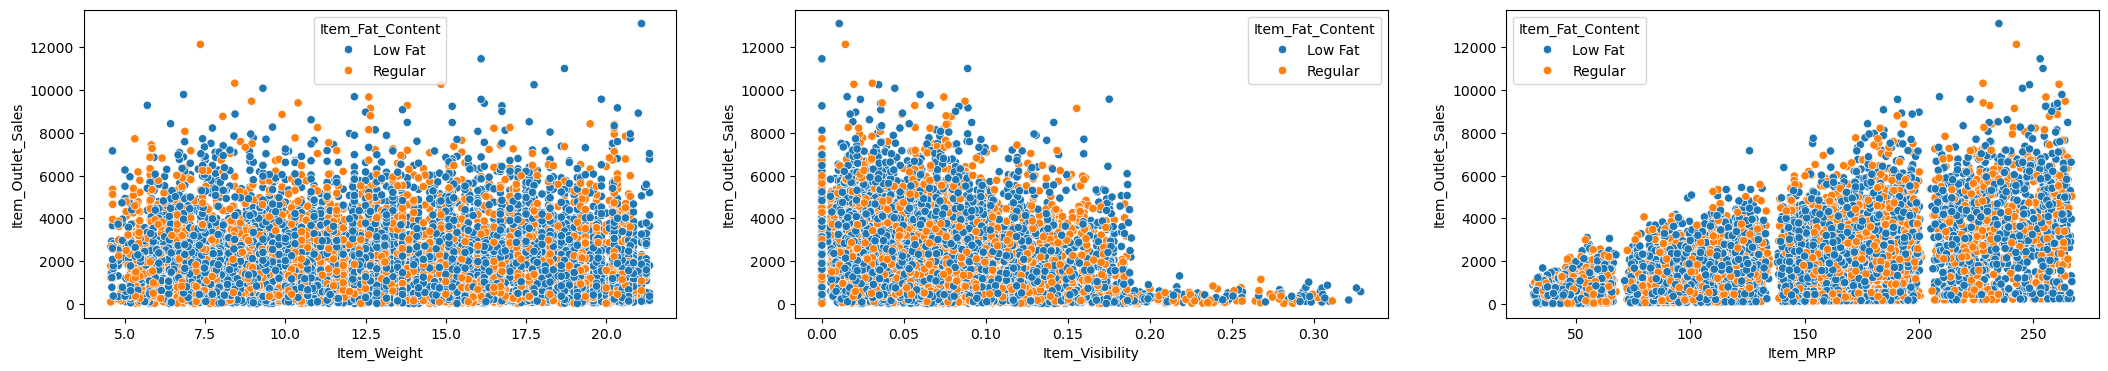

In [150]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(26, 4))

for index, col in enumerate(['Item_Weight', 'Item_Visibility', 'Item_MRP']):
    sns.scatterplot(data=train,x=col, y=sales_train, ax=ax[index], hue='Item_Fat_Content')

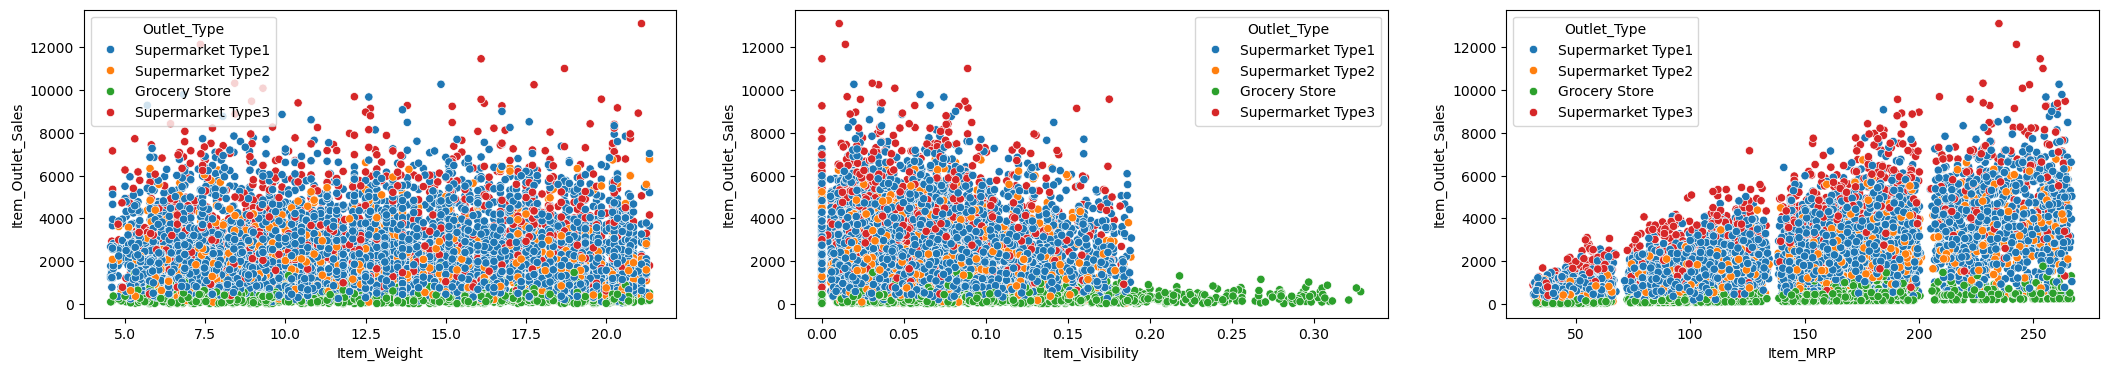

In [151]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(26, 4))

for index, col in enumerate(['Item_Weight', 'Item_Visibility', 'Item_MRP']):
    sns.scatterplot(data=train,x=col, y=sales_train, ax=ax[index], hue='Outlet_Type')

### **Conclusion:**
#### 1. Amongst all the other categorical variables, the most clear clustering pattern happens in Outlet_Type across all numerical features.
#### 2. This suggest that Outlet_Type may be the most influential feature for our model.